## Final Assessment - BCI3333 Machine Learning Application
## Noel Foo Sei Wee CB20066

spotify_all_genres_tracks.csv (https://www.kaggle.com/datasets/laurabarreda/spotify-tracks-by-genre-8-genres-classification)

KNN & Random Forest Classifier

In [1]:
# Random Forest Classifier
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset
dataset = pd.read_csv('spotify_all_genres_tracks.csv')
print(dataset.head(), '\n\n')
print(dataset.shape, '\n\n')
print(dataset.info(), '\n\n')

                 track_id                                       playlist_url  \
0  4Gia17DzXBhYFbYiJj6SyW  https://open.spotify.com/playlist/7qACZGMjyo64...   
1  1BjYNhg7JhVfQdxqEThBwn  https://open.spotify.com/playlist/7qACZGMjyo64...   
2  2Cg3GUkhjX96nO4p2WRlIa  https://open.spotify.com/playlist/7qACZGMjyo64...   
3  5bC6ONDsL88snGN6QasjZH  https://open.spotify.com/playlist/7qACZGMjyo64...   
4  2TKykeHeVKsBqZC8M3SKcN  https://open.spotify.com/playlist/7qACZGMjyo64...   

        playlist_name               track_name  track_popularity  \
0  The Sound of Blues              Working Man                51   
1  The Sound of Blues            Long Way Home                38   
2  The Sound of Blues        She's A Sweet One                49   
3  The Sound of Blues                  Help Me                59   
4  The Sound of Blues  Take Out Some Insurance                51   

                  artist_name  \
0                   Otis Rush   
1  Clarence "Gatemouth" Brown   
2          

In [2]:
# drop unnecessary columns
dataset.drop(['track_id', 'playlist_url', 'playlist_name', 'track_name', 'artist_name', 'album', 'album_cover', 'artist_genres'], axis=1, inplace=True)
print(dataset.head(), '\n\n')

   track_popularity  artist_popularity  danceability  energy  key  loudness  \
0                51                 41         0.633   0.625    0   -10.951   
1                38                 33         0.728   0.054   11   -22.557   
2                49                 41         0.705   0.483    1   -12.209   
3                59                 46         0.745   0.436    5    -9.617   
4                51                 42         0.747   0.288    9   -14.435   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0436         0.492          0.000418     0.204    0.841   
1     0       0.0380         0.910          0.048000     0.120    0.425   
2     1       0.0542         0.150          0.026500     0.202    0.713   
3     0       0.0430         0.597          0.021300     0.610    0.771   
4     1       0.0513         0.663          0.000000     0.122    0.566   

     tempo  duration_ms  time_signature  genre  
0  103.355       147800  

In [3]:
# check for null values
print(dataset.isnull().sum(), '\n\n')
dataset = dataset.dropna()

track_popularity     0
artist_popularity    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
genre                0
dtype: int64 




In [4]:
# check for duplicate rows
print(dataset.duplicated().sum(), '\n\n')

# drop duplicate rows
dataset.drop_duplicates(inplace=True)
print(dataset.duplicated().sum(), '\n\n')

1 


0 




In [5]:
# check for outliers
print(dataset.describe(), '\n\n')

       track_popularity  artist_popularity  danceability       energy  \
count       9197.000000        9197.000000   9197.000000  9197.000000   
mean          48.892247          51.161683      0.595370     0.535905   
std           17.502421          16.081778      0.192937     0.273215   
min            0.000000           0.000000      0.000000     0.000885   
25%           38.000000          42.000000      0.474000     0.334000   
50%           49.000000          52.000000      0.621000     0.579000   
75%           61.000000          62.000000      0.744000     0.757000   
max           95.000000         100.000000      0.984000     0.999000   

               key     loudness         mode  speechiness  acousticness  \
count  9197.000000  9197.000000  9197.000000  9197.000000   9197.000000   
mean      5.358921   -10.705532     0.596390     0.084686      0.362160   
std       3.559050     6.573180     0.490648     0.081617      0.368856   
min       0.000000   -47.001000     0.0000

In [6]:
# convert categorical data to numerical data - genre
# blues = 0, classical = 1, jazz = 2, hiphop = 3, pop = 4, reggae = 5, rock = 6, electronic = 7 as integers
dataset['genre'] = dataset['genre'].map({'blues': 0, 'classical': 1, 'jazz': 2, 'hiphop': 3, 'pop': 4, 'reggae': 5, 'rock': 6, 'electronic': 7})
print(dataset.head(), '\n\n')

   track_popularity  artist_popularity  danceability  energy  key  loudness  \
0                51                 41         0.633   0.625    0   -10.951   
1                38                 33         0.728   0.054   11   -22.557   
2                49                 41         0.705   0.483    1   -12.209   
3                59                 46         0.745   0.436    5    -9.617   
4                51                 42         0.747   0.288    9   -14.435   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0436         0.492          0.000418     0.204    0.841   
1     0       0.0380         0.910          0.048000     0.120    0.425   
2     1       0.0542         0.150          0.026500     0.202    0.713   
3     0       0.0430         0.597          0.021300     0.610    0.771   
4     1       0.0513         0.663          0.000000     0.122    0.566   

     tempo  duration_ms  time_signature  genre  
0  103.355       147800  

                   track_popularity  artist_popularity  danceability  \
track_popularity           1.000000           0.780368      0.129456   
artist_popularity          0.780368           1.000000     -0.023593   
danceability               0.129456          -0.023593      1.000000   
energy                     0.288364           0.150920      0.446537   
key                       -0.001324          -0.014163      0.054717   
loudness                   0.338657           0.207480      0.526008   
mode                       0.005078           0.023899     -0.071770   
speechiness                0.081427           0.062168      0.326777   
acousticness              -0.288495          -0.137530     -0.520689   
instrumentalness          -0.347600          -0.292190     -0.293468   
liveness                   0.046892           0.044741     -0.002550   
valence                    0.068579          -0.032466      0.562963   
tempo                      0.074668           0.040968      0.02

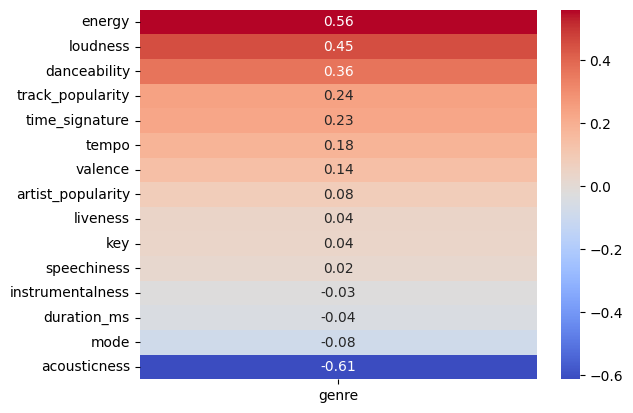

   track_popularity  artist_popularity  danceability  energy  loudness  mode  \
0                51                 41         0.633   0.625   -10.951     1   
1                38                 33         0.728   0.054   -22.557     0   
2                49                 41         0.705   0.483   -12.209     1   
3                59                 46         0.745   0.436    -9.617     0   
4                51                 42         0.747   0.288   -14.435     1   

   acousticness  valence    tempo  time_signature  genre  
0         0.492    0.841  103.355               4      0  
1         0.910    0.425   78.033               4      0  
2         0.150    0.713  122.863               4      0  
3         0.597    0.771  114.216               4      0  
4         0.663    0.566  111.330               4      0   




In [7]:
# correlation matrix
print(dataset.corr(), '\n\n')

#Data Visualization for correlation
import seaborn as sns
corr = dataset.corr().sort_values(by='genre', ascending=False)
print(corr['genre'])
sns.heatmap(corr['genre'].drop('genre').to_frame(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

# drop weak correlated columns
# liveness, key, duration_ms, instrumentalness, speechiness
dataset.drop(['liveness', 'key', 'duration_ms', 'instrumentalness', 'speechiness'], axis=1, inplace=True)
print(dataset.head(), '\n\n')

In [8]:
# set independent and dependent variables
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(x, '\n\n')
print(y, '\n\n')

[[ 51.     41.      0.633 ...   0.841 103.355   4.   ]
 [ 38.     33.      0.728 ...   0.425  78.033   4.   ]
 [ 49.     41.      0.705 ...   0.713 122.863   4.   ]
 ...
 [  7.      7.      0.716 ...   0.181 130.012   4.   ]
 [ 24.     27.      0.763 ...   0.687 147.998   4.   ]
 [ 35.     37.      0.677 ...   0.407 134.774   4.   ]] 


[0 0 0 ... 7 7 7] 




In [9]:
# split dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)
print(x_train, '\n\n')
print(x_test, '\n\n')
print(y_train, '\n\n')
print(y_test, '\n\n')

[[ 57.     55.      0.575 ...   0.738  89.846   4.   ]
 [ 63.     57.      0.848 ...   0.787  97.736   4.   ]
 [ 18.     27.      0.404 ...   0.81  203.196   4.   ]
 ...
 [ 36.     52.      0.388 ...   0.484  98.193   3.   ]
 [ 70.     58.      0.65  ...   0.649  89.887   4.   ]
 [ 32.     49.      0.619 ...   0.42  143.64    4.   ]] 


[[4.90000e+01 4.50000e+01 6.89000e-01 ... 9.61000e-01 1.21019e+02
  4.00000e+00]
 [7.90000e+01 7.80000e+01 9.24000e-01 ... 6.21000e-01 1.33974e+02
  4.00000e+00]
 [5.20000e+01 3.90000e+01 8.08000e-01 ... 9.14000e-01 1.40847e+02
  4.00000e+00]
 ...
 [4.60000e+01 5.50000e+01 1.62000e-01 ... 9.03000e-02 9.40090e+01
  3.00000e+00]
 [4.50000e+01 4.00000e+01 6.14000e-01 ... 7.50000e-02 1.12972e+02
  4.00000e+00]
 [8.60000e+01 7.30000e+01 3.45000e-01 ... 2.32000e-01 1.79773e+02
  3.00000e+00]] 


[6 3 0 ... 1 4 2] 


[7 3 5 ... 1 7 4] 




In [10]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train, '\n\n')
print(x_test, '\n\n')

[[ 0.46679234  0.23793489 -0.10424746 ...  0.88774608 -0.91443321
   0.25441277]
 [ 0.81011992  0.3620081   1.30999354 ...  1.07192201 -0.64432691
   0.25441277]
 [-1.76483688 -1.49909013 -0.99009073 ...  1.15837194  2.96599127
   0.25441277]
 ...
 [-0.73485416  0.05182506 -1.07297665 ... -0.06696179 -0.62868197
  -2.25795601]
 [ 1.21066875  0.42404471  0.28428028 ...  0.55322246 -0.91302962
   0.25441277]
 [-0.96373921 -0.13428476  0.12368881 ... -0.30751811  0.92715086
   0.25441277]] 


[[ 0.00902225 -0.38243119  0.48631471 ...  1.72593449  0.15274343
   0.25441277]
 [ 1.72566011  1.66477687  1.70370166 ...  0.44797907  0.59624497
   0.25441277]
 [ 0.18068603 -0.75465084  1.10277874 ...  1.54927595  0.83153528
   0.25441277]
 ...
 [-0.16264154  0.23793489 -2.24374026 ... -1.546759   -0.77191705
  -2.25795601]
 [-0.2198628  -0.69261423  0.09778696 ... -1.60426699 -0.12273761
   0.25441277]
 [ 2.12620895  1.35459383 -1.29573256 ... -1.01415228  2.16412817
  -2.25795601]] 




In [11]:
# fitting knn classifier to training set
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifierKNN.fit(x_train, y_train)

# fitting random forest classifier to training set
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
classifierRF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [12]:
# predict test set results
y_predKNN = classifierKNN.predict(x_test)
y_predRF = classifierRF.predict(x_test)
print(y_predKNN, '\n\n')
print(y_predRF, '\n\n')

[7 4 5 ... 1 7 4] 


[7 4 5 ... 1 7 4] 




[[123   0  29   6   2  21  15  11]
 [  9 167  22   0   0   0   0   0]
 [ 35  16 136   2   4   1   4   2]
 [ 12   0   1  99  44  22   8  19]
 [  4   3   5  29 177   3  17  12]
 [ 25   0   1  33   7 122   6  14]
 [  9   0   5  12  40   1 141  19]
 [ 18   2  11  34  17  19  17 227]] 




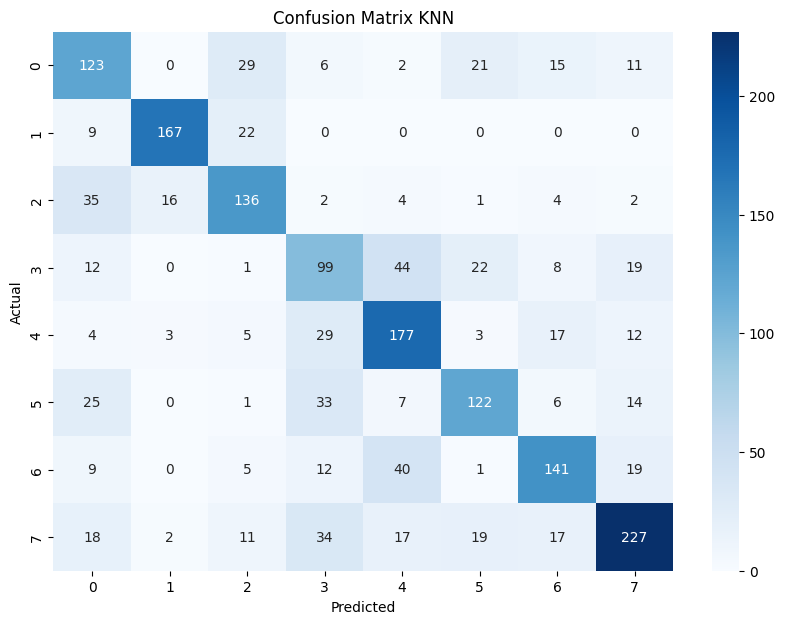

[[139   0  24   5   1  12   9  17]
 [  5 175  17   0   0   0   0   1]
 [ 39  17 136   0   2   1   1   4]
 [ 11   0   1  93  38  23  14  25]
 [  0   0   3  29 185   3  21   9]
 [ 25   0   1  22   7 134   4  15]
 [  9   0   3   3  21   2 175  14]
 [ 15   1  10  19  16  19  17 248]] 




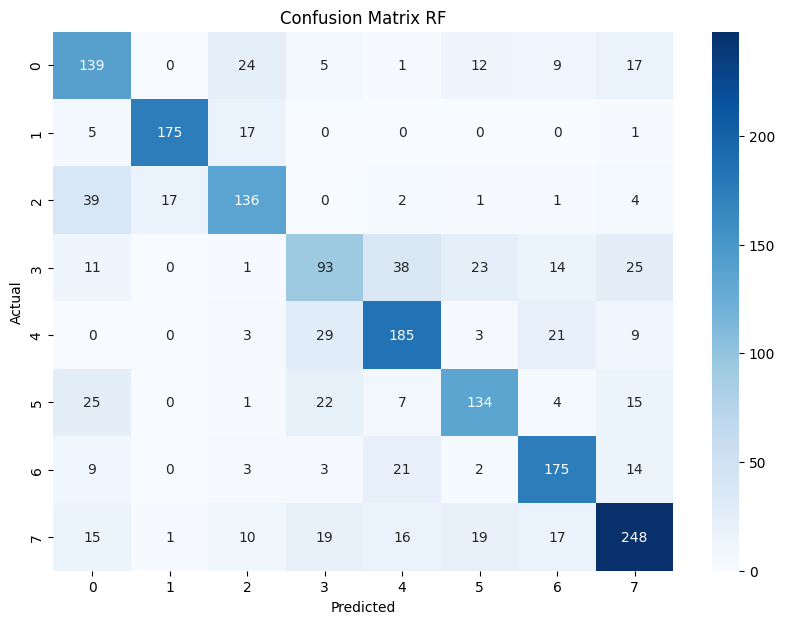

In [13]:
# making the confusion matrix - KNN
from sklearn.metrics import confusion_matrix
cmKNN = confusion_matrix(y_test, y_predKNN)
print(cmKNN, '\n\n')

# plot confusion matrix -KNN
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cmKNN, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

# making the confusion matrix - RF
from sklearn.metrics import confusion_matrix
cmRF = confusion_matrix(y_test, y_predRF)
print(cmRF, '\n\n')

# plot confusion matrix -RF
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cmRF, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RF')
plt.show()

In [14]:
# precision score, recall score, f-score, accuracy score - KNN
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('K Nearest Neighbors Classifier')
print('Precision Score: ', precision_score(y_test, y_predKNN, average='weighted'))
print('Recall Score: ', recall_score(y_test, y_predKNN, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_predKNN, average='weighted'))
print('Accuracy Score: ', accuracy_score(y_test, y_predKNN), '\n\n')

# precision score, recall score, f-score, accuracy score - RF
print('Random Forest Classifier')
print('Precision Score: ', precision_score(y_test, y_predRF, average='weighted'))
print('Recall Score: ', recall_score(y_test, y_predRF, average='weighted'))
print('F1 Score: ', f1_score(y_test, y_predRF, average='weighted'))
print('Accuracy Score: ', accuracy_score(y_test, y_predRF))

K Nearest Neighbors Classifier
Precision Score:  0.6554174799681497
Recall Score:  0.6478260869565218
F1 Score:  0.6498827397197631
Accuracy Score:  0.6478260869565218 


Random Forest Classifier
Precision Score:  0.6987265515997398
Recall Score:  0.6983695652173914
F1 Score:  0.6972579157418715
Accuracy Score:  0.6983695652173914


In [15]:
# Random Forest Classifier has the highest accuracy score
# therefore, it is the best model for this dataset
# save random forest classifier model to pickle file
import pickle
pickle.dump(classifierRF, open('spotify_rf.pkl', 'wb'))